# Neural_Network_Assignment_(Forest_Fire)

In [66]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [38]:
#Importing dataset
df=pd.read_csv('C:/Users/Akash Kundu/Desktop/ExcelR/Assingments/forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


### EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [40]:
#Check and drop duplicates
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [41]:
df1=df.drop_duplicates()

In [42]:
df1[df1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [43]:
df1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [44]:
df1.shape

(509, 31)

In [45]:
df2=df1.drop(df1.columns[10:30],axis=1)

In [46]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [47]:
#Replace the month and day columns with numbers as they are catagorical data
df2.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
df2.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace = True)

In [48]:
#label encode the catagorical data
df2['size_category']=LabelEncoder().fit_transform(df2['size_category'])

In [49]:
df2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
512,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


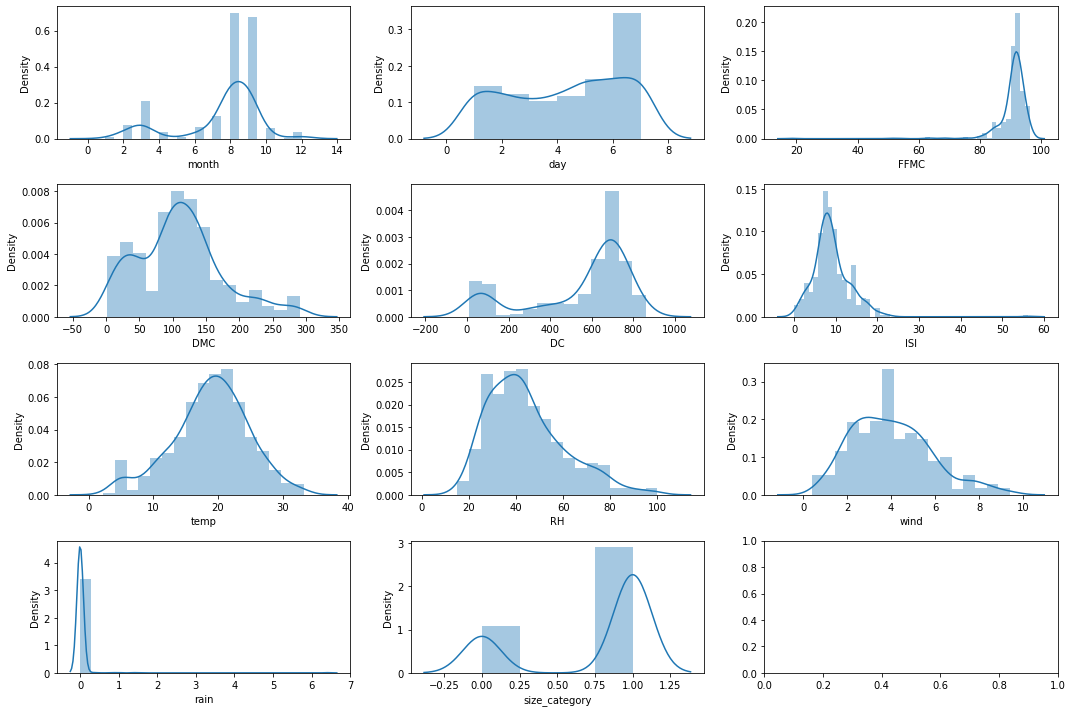

In [50]:
#Visualization using distplot
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(df2.month, ax=ax[0,0])
sns.distplot(df2.day, ax=ax[0,1])
sns.distplot(df2.FFMC, ax=ax[0,2])
sns.distplot(df2.DMC, ax=ax[1,0])
sns.distplot(df2.DC, ax=ax[1,1])
sns.distplot(df2.ISI, ax=ax[1,2])
sns.distplot(df2.temp, ax=ax[2,0])
sns.distplot(df2.RH, ax=ax[2,1])
sns.distplot(df2.wind, ax=ax[2,2])
sns.distplot(df2.rain, ax=ax[3,0])
sns.distplot(df2.size_category, ax=ax[3,1])

plt.tight_layout()
plt.show()

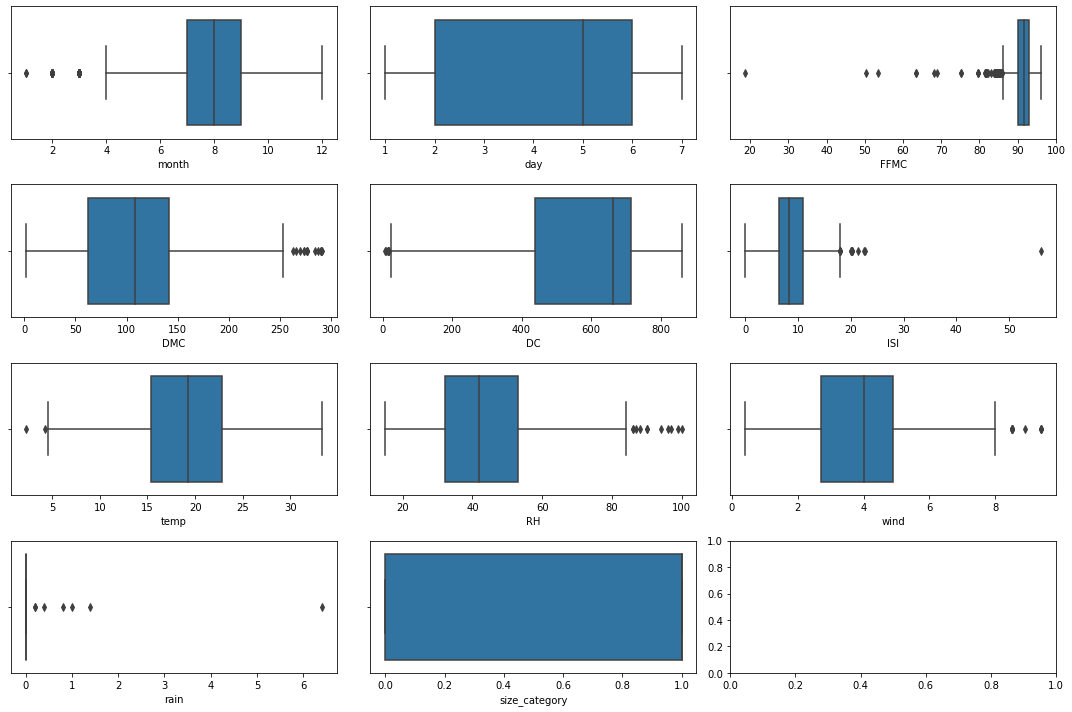

In [51]:
#Checking of the outlier
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(df2.month, ax=ax[0,0])
sns.boxplot(df2.day, ax=ax[0,1])
sns.boxplot(df2.FFMC, ax=ax[0,2])
sns.boxplot(df2.DMC, ax=ax[1,0])
sns.boxplot(df2.DC, ax=ax[1,1])
sns.boxplot(df2.ISI, ax=ax[1,2])
sns.boxplot(df2.temp, ax=ax[2,0])
sns.boxplot(df2.RH, ax=ax[2,1])
sns.boxplot(df2.wind, ax=ax[2,2])
sns.boxplot(df2.rain, ax=ax[3,0])
sns.boxplot(df2.size_category, ax=ax[3,1])

plt.tight_layout()
plt.show()

### Extrating Independent and Dependent variables


In [52]:
X=df2.iloc[:,0:10].values
Y=df2.iloc[:,-1].values

In [53]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [54]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
# fix random seed for reproducibility
seed=7
np.random.seed(seed)

### Building Model

In [56]:
model= Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [57]:
#compile Model
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

### Model testing

In [58]:
model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.4487 - val_loss: 0.3421 - val_accuracy: 0.6012
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.6716 - val_loss: 0.2801 - val_accuracy: 0.6071
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.7273 - val_loss: 0.2774 - val_accuracy: 0.6667
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.7654 - val_loss: 0.2683 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1926 - accuracy: 0.7654 - val_loss: 0.2321 - val_accuracy: 0.6667
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1873 - accuracy: 0.7654 - val_loss: 0.2429 - val_accuracy: 0.6667
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.7713 - val_loss: 0.2979 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7654 - val_loss: 0.2300 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.7654 - val_loss: 0.2619 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.7654 - val_loss: 0.2355 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1784 - accuracy: 0.7654 - val_loss: 0.2551 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.7654 - val_loss: 0.2343 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.7742 - val_loss: 0.2482 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.7683 - val_loss: 0.2301 - val_accuracy: 0.6726
Epoch 

In [59]:
# evaluate the model
scores=model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.7387
accuracy: 54.57%


In [60]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1771 - accuracy: 0.7713 - val_loss: 0.2543 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1783 - accuracy: 0.7713 - val_loss: 0.2558 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.7713 - val_loss: 0.2394 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.7713 - val_loss: 0.2493 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.7683 - val_loss: 0.2459 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.7742 - val_loss: 0.2792 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.7713 - val_loss: 0.2279 - val_accuracy: 0.6726
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.7713 - val_loss: 0.2410 - val_accuracy: 0.6726
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1711 - accuracy: 0.7713 - val_loss: 0.2329 - val_accuracy: 0.6726
Epoch 61/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.7713 - val_loss: 0.2504 - val_accuracy: 0.6726
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.7713 - val_loss: 0.2532 - val_accuracy: 0.6726
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.7742 - val_loss: 0.2312 - val_accuracy: 0.6726
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1773 - accuracy: 0.7713 - val_loss: 0.2638 - val_accuracy: 0.6726
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1760 - accuracy: 0.7683 - val_loss: 0.2623 - val_accuracy: 0.6726
Epoch 

In [61]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

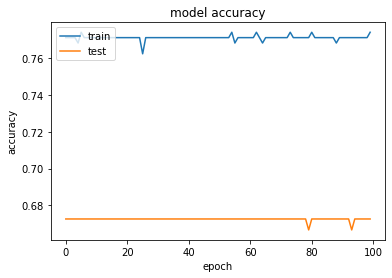

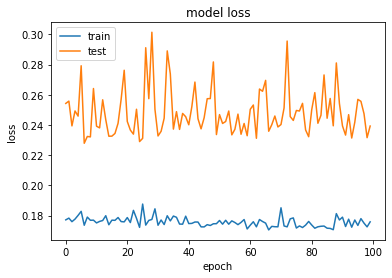

In [62]:
# Visualize training history


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Tuning of Hyperparameter:- Batch Size and Epochs
 

In [67]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam

In [68]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [69]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.8s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.9s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.8s
